# AMATH 422/522 Python Lab Manual, Part 5

### Tutorial on ODEs and Numerical Solvers

THE GOALS OF THIS TUTORIAL ARE:
* TO LEARN HOW TO PLOT A DIRECTION FIELD FOR AN ODE MODEL.
*TO LEARN HOW TO USE THE EULER and HIGHER-ORDER METHODS TO PLOT A SOLUTION TO THE MODEL, FOLLOWING THE ARROWS OF THIS DIRECTION FIELD.


#### Import the usual, plus scipy package for solving initial value problems

In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as int


### Defining the ODE.  

Here, we'll be working with two-dimensional ordinary 
differential equation (ODE) models in the $(x_1,x_2)$ plane.  These are defined by
\begin{aligned}
\frac{dx_1}{dt} &=& f(x_1,x_2) \\
\frac{dx_2}{dt} &=& g(x_1,x_2)
\end{aligned}


Let's work with the specific example
 \begin{aligned}
\frac{dx_1}{dt} &=& x_2 \\
\frac{dx_2}{dt} &=& -x_1
 \end{aligned}




To  solve this with the python solvers -- just as for the odeint integrators may of you may know from MATLAB -- we need to define the righthand side as a function.  The syntax can seem a bit funny.  The function must take two arguments (inputs):  t and x.  Here, t is time, and we specify it as an argument even the righthand side of your ODE does not depend on t, like in the examples above.  The second is a vector (ndarray in python), with all the state variables.  Here, $$ x= \left(
\begin{array}{c}
  x_1  \\
  x_2     
\end{array}
\right) $$ 
The function returns the vector (ndarray)
  $$ \left(
\begin{array}{c}
  f(x_1,x_2)  \\
  g(x_1,x_2)    
\end{array}
\right) $$ 
 namely, the appropriate right-hand-side.
 
Let's do this in the function ode1 below.  We first unpack the x vector into named variables in the ODE itself.  It's possible to make mistakes here, since x is used for both, and python begins its indexing with 0. Anyway, here it is:


In [3]:
def odefun_1(t,x):
    x1=x[0] 
    x2=x[1]
    return np.array([x2,-x1])

#test
x0=np.array([1,2])
t=0
print(odefun_1(t,x0))


[ 2 -1]


### Plotting the vector (arrow) field

Now, we want to plot a forest of arrows, that tell us the direction in which our ODE solution is headed, when it currently is situated at any point in the plane.  Thanks to this very nice post for guidance here!
https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html

Here we go.  First step:  let's get a definition out of the way.  

In [4]:
t=0   #MUST define a value of time for calling ode function above, even if it is not used in defining the ODE 

Next, define range of x1 and x2 values over which we'll make the plot.  

In [5]:

x1min=-2
x1max=2
numptsx1=10
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=-2
x2max=2
numptsx2=10
x2list=np.linspace(x2min,x2max,numptsx2)


Next, we are going to define a grid of x1 and x2 values, based on the lists
above. The (i,j) point on that grid will correspond to elements (i,j) in four matrices that we are about to make.
* x1 values increase across ROWS (horizontal direction, index j)
* x2 values increase down COLUMNS (vertical direction, index i)

In [6]:
x1array,x2array = np.meshgrid(x1list,x2list)
# print(x1array)

That makes two 2D arrays.  Element (i,j) of x1array is the x1 coordinate for that (i,j). Element (i,j) of x2array is the x2 coordinate
for that (i,j).

OK, we're getting there!  Next, we need a grid of velocity values, in each for the $x_1$ and $x_2$ directions, evaluated at each grid point ($x_1,x_2$).  The velocities will give us, respectively, the horizontal and vertical extent of the arrows emanating from ($x_1,x_2$).  In other words, we need to evaluate $\frac{dx_1}{dt}(x_1,x_2)= f(x_1,x_2)$ and $\frac{dx_2}{dt}(x_1,x_2)=g(x_1,x_2)$ at each grid point.

In [7]:
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)

In [8]:
for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):
        
        #here, F is an array of velocities in x1 and x2 directions    
        F=odefun_1(t,[x1array[i,j],x2array[i,j]])

        #We fill in these two matrices with the corresponding velocities
        dx1dt_array[i,j]=F[0]
        dx2dt_array[i,j]=F[1]
        

Finally, we plot the arrows, via the matplotlib quiver command. 

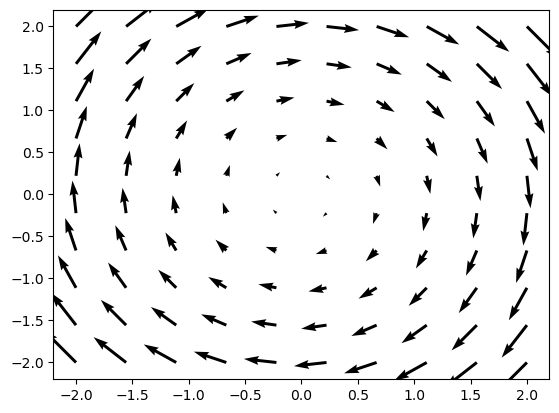

In [9]:
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array) 

### Solving the ODE via scipy integrate module, which we imported above

Let's start with a simple example from the scipy docs.  We'll just solve the 1-D ODE for starters:  $$\frac{dy}{dt} = -0.5 y $$

In [10]:
def exponential_decay(t, y): 
    return -0.5 * y


We pass a time range, initial condition, and evaluation  time list into solve_ivp as follows

In [11]:
#specify our initial condition
y0=np.array([1])

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=int.solve_ivp(exponential_decay, trange, y0, t_eval=tlist)

By default this calls the solver RK45, which is an order 4/5 Runge-Kutta method that is a good choice for general problems (and similar to ode45 in MATLAB).  See the documention 

This returns the object sol.  
* sol.t is the list of times at which solution is returned
* sol.y is the solution.  This is an ndarray, each ``row'' of which are the solution values for one of the state variables. 

Here, we have just one state variable, so we pull out the first row for the list of y values


Text(0, 0.5, 'y')

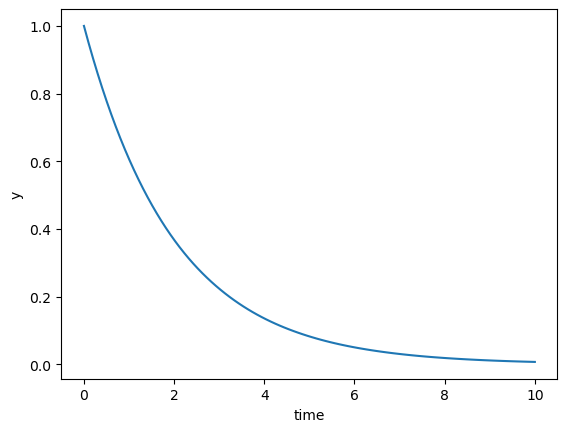

In [12]:
plt.plot(sol.t,sol.y[0,:])
plt.xlabel('time')
plt.ylabel('y')

Now let's use similar syntax for our 2-D ODE odefun_1:


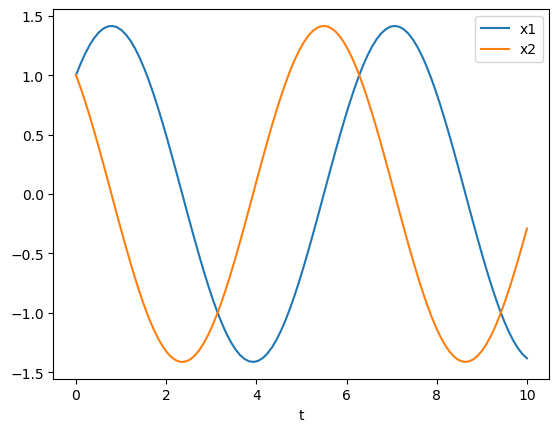

In [13]:
#specify our initial condition
x0=np.array([1,1])

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=int.solve_ivp(odefun_1, trange, x0, t_eval=tlist)

plt.figure(1)
plt.plot(sol.t,sol.y[0,:],label='x1')
plt.plot(sol.t,sol.y[1,:],label='x2')
plt.xlabel('t')
plt.legend()

Finally, we can add the trajectory to our vector field

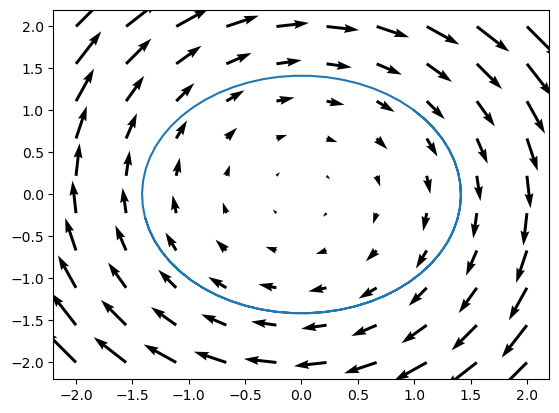

In [14]:
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array) 
plt.plot(sol.y[0,:],sol.y[1,:],label='x1')

**A good match :)**

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a co